# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = 'metric'
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # # Add 1 to the record count
    record_count += 1
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | midvagur
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | yazd
Processing Record 4 of Set 1 | mossel bay
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | maintirano
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | nova vicosa
Processing Record 11 of Set 1 | tan-tan
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | nenjiang
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | kerikeri
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | whitehorse
Processing Record 22 of Set 1 | ulladulla
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,midvagur,62.0511,-7.1939,10.46,87,75,8.23,FO,1717175840
1,port mathurin,-19.6833,63.4167,24.58,69,71,11.88,MU,1717175840
2,yazd,31.8972,54.3675,35.06,10,0,3.09,IR,1717175840
3,mossel bay,-34.1831,22.1460,12.96,70,100,2.65,ZA,1717175841
4,port-aux-francais,-49.3500,70.2167,6.38,95,100,15.63,TF,1717175841


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midvagur,62.0511,-7.1939,10.46,87,75,8.23,FO,1717175840
1,port mathurin,-19.6833,63.4167,24.58,69,71,11.88,MU,1717175840
2,yazd,31.8972,54.3675,35.06,10,0,3.09,IR,1717175840
3,mossel bay,-34.1831,22.1460,12.96,70,100,2.65,ZA,1717175841
4,port-aux-francais,-49.3500,70.2167,6.38,95,100,15.63,TF,1717175841


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

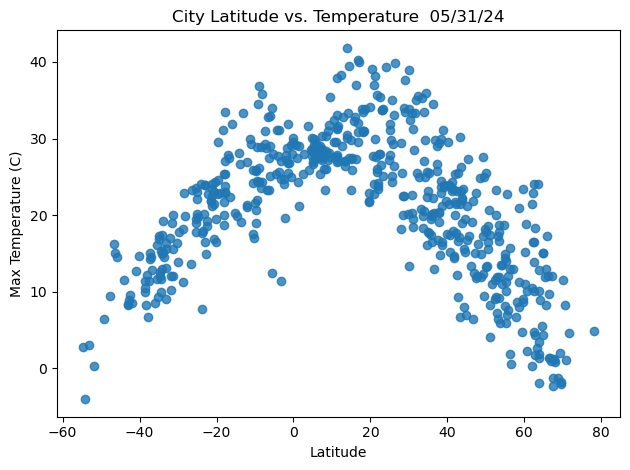

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature  " +  time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

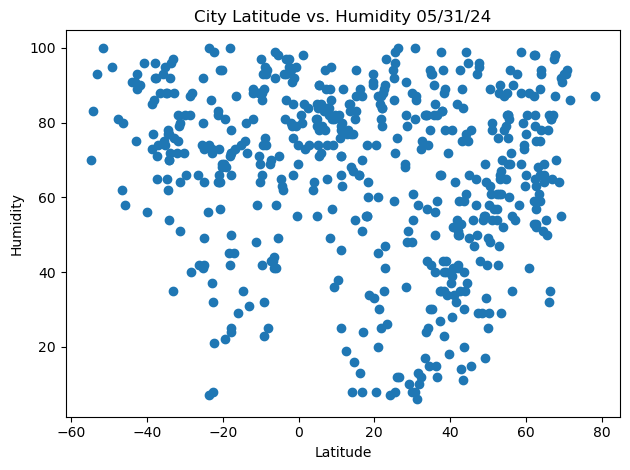

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

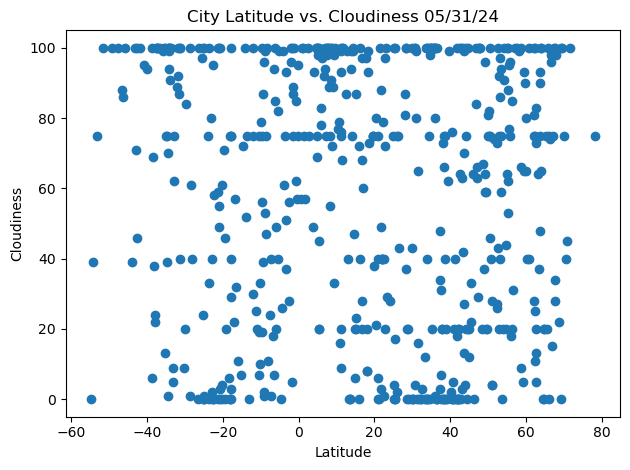

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

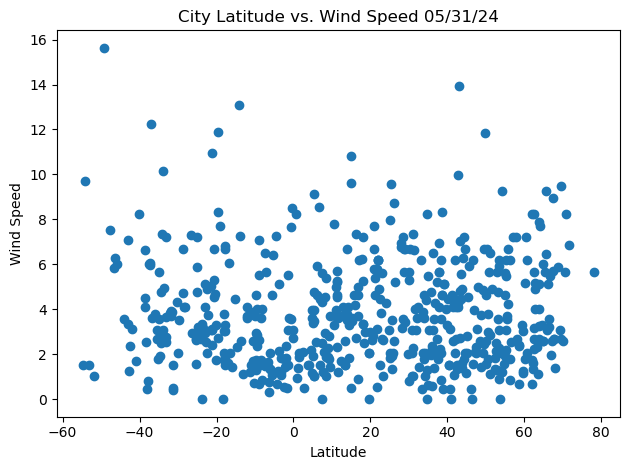

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) >= 0, :]
# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midvagur,62.0511,-7.1939,10.46,87,75,8.23,FO,1717175840
2,yazd,31.8972,54.3675,35.06,10,0,3.09,IR,1717175840
8,sitka,57.0531,-135.3300,12.94,54,100,7.20,US,1717175842
10,tan-tan,28.4380,-11.1032,19.97,82,100,7.20,MA,1717175843
14,nenjiang,49.1833,125.2167,12.35,55,96,2.49,CN,1717175843


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) < 0, :]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,24.58,69,71,11.88,MU,1717175840
3,mossel bay,-34.1831,22.1460,12.96,70,100,2.65,ZA,1717175841
4,port-aux-francais,-49.3500,70.2167,6.38,95,100,15.63,TF,1717175841
5,maintirano,-18.0667,44.0167,25.34,71,0,3.03,MG,1717175841
6,port macquarie,-31.4333,152.9167,15.50,80,100,0.51,AU,1717175842


###  Temperature vs. Latitude Linear Regression Plot

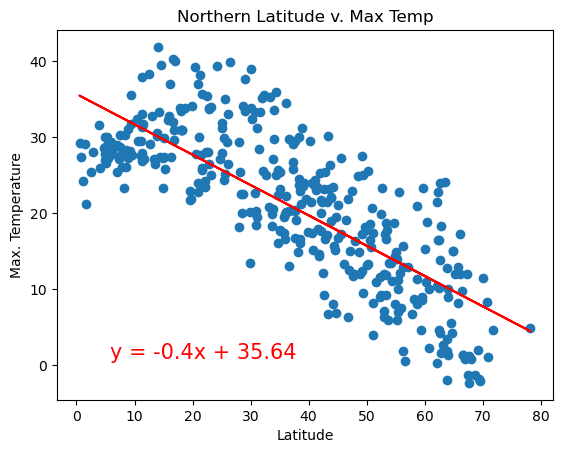

In [14]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
x_1 = northern_df['Lat']
y_1 = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature')
plt.title('Northern Latitude v. Max Temp')
plt.show()

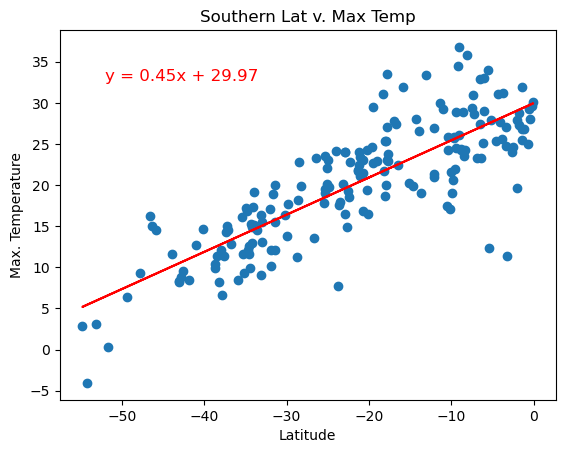

In [15]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
x_2 = southern_df['Lat']
y_2 = southern_df['Max Temp']
# Adjust the position of the equation text
x_pos = x_2.min() + (x_2.max() - x_2.min()) * 0.05
y_pos = y_2.min() + (y_2.max() - y_2.min()) * 0.9

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.text(x_pos, y_pos, line_eq, fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature')
plt.title('Southern Lat v. Max Temp')
plt.show()

**Discussion about the linear relationship:** Northern hemisphere shows a negative downward slope, southern hemisphere shows a positive upward slope. So as latitude rises in the north, temperature goes down and as latitude rises in the south, temperature goes up.

### Humidity vs. Latitude Linear Regression Plot

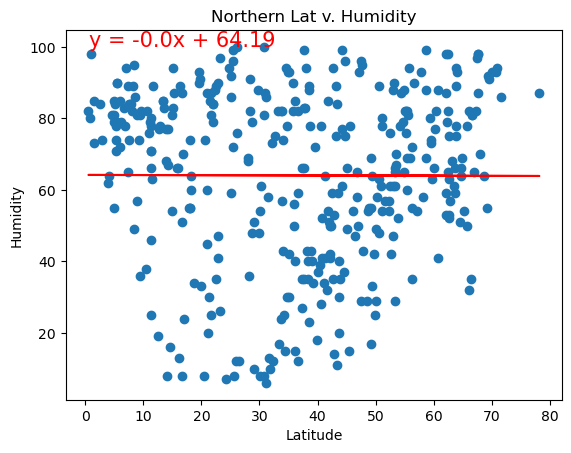

In [16]:
# Northern Hemisphere
# Northern Hemisphere
x_1 = northern_df['Lat']
y_1 = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq, (x_1.min() + 0.05, y_1.max() - 0.05), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Lat v. Humidity')
plt.show()

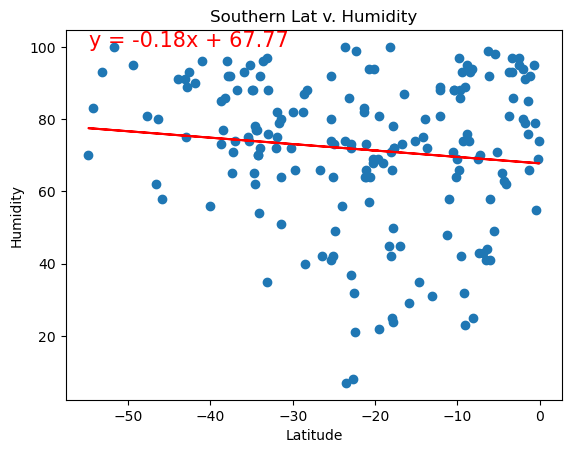

In [17]:

# Southern Hemisphere
x_2 = southern_df['Lat']
y_2 = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq, (x_2.min() + 0.05, y_2.max() - 0.05), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Lat v. Humidity')
plt.show()

**Discussion about the linear relationship:** Northern hemisphere does not seem to have any correlation between humidity and latitude, but southern hemisphere shows a positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

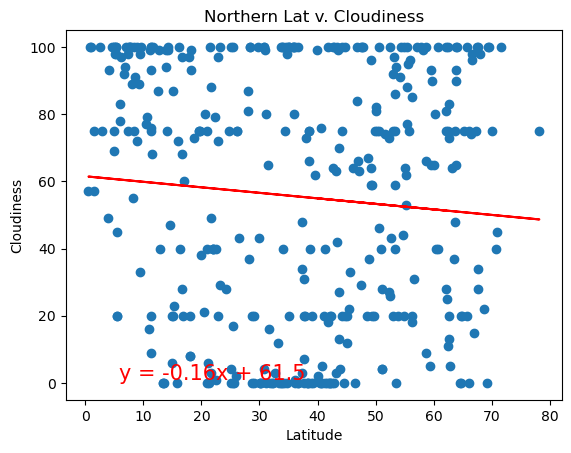

In [18]:
# Northern Hemisphere
x_1 = northern_df['Lat']
y_1 = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Lat v. Cloudiness')
plt.show()

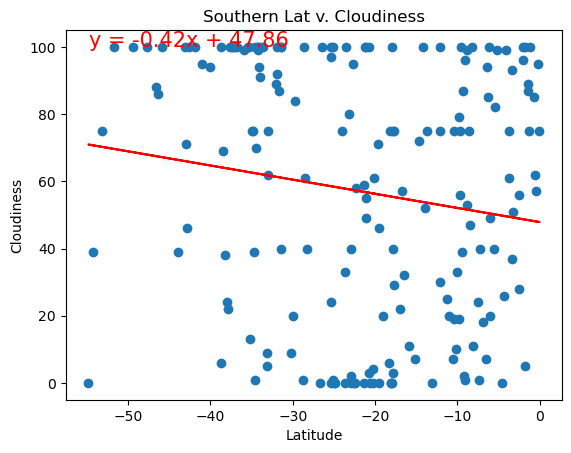

In [19]:
# Southern Hemisphere
x_2 = southern_df['Lat']
y_2 = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq, (x_2.min() + 0.05, y_2.max() - 0.05), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Lat v. Cloudiness')
plt.show()

**Discussion about the linear relationship:** Northen hemisphere has a slight negative correlation for cloudiness and latitude. Southern hemisphere has a positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

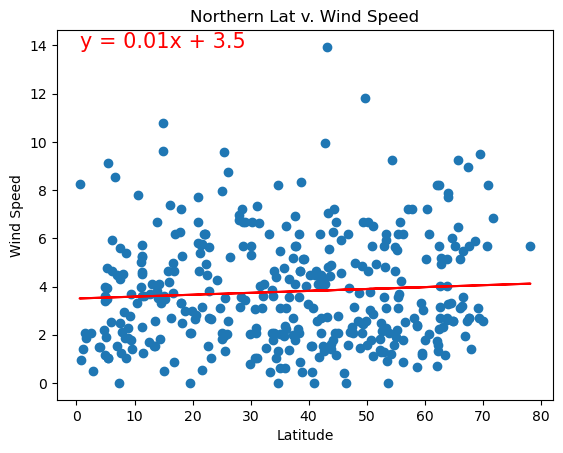

In [20]:
# Northern Hemisphere
x_1 = northern_df['Lat']
y_1 = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq, (x_1.min() + 0.05, y_1.max() - 0.05), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Lat v. Wind Speed')
plt.show()

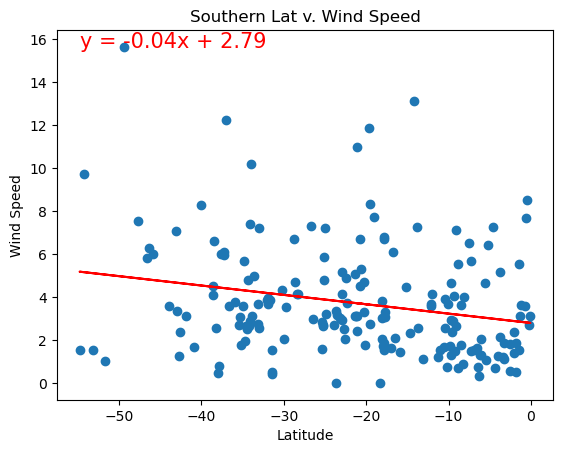

In [21]:
# Southern Hemisphere
x_2 = southern_df['Lat']
y_2 = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq, (x_2.min() + 0.05, y_2.max() - 0.05), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Lat v. Wind Speed')
plt.show()

**Discussion about the linear relationship:** Both hemispheres have a slight negative correlation but it is almost neutral (line is almost straight across).